In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

In [2]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

In [3]:
table = soup.find('table', attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})

In [4]:
temp = [] #initiating a tuple
tr = table.find_all('tr')

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    
    #harga harian
    day_price = row.find_all('td')[2].text
    day_price = day_price.strip() #for removing the excess whitespace
    
    #get inflasi
    tanggal = row.find_all('td')[0].text
    tanggal = tanggal.strip() #for removing the excess whitespace
    
    temp.append((tanggal,day_price)) 
temp = temp[::-1]
temp

[('6/4/2020', '14,113.82802 IDR'),
 ('6/5/2020', '14,305.96407 IDR'),
 ('6/7/2020', '13,989.39489 IDR'),
 ('6/8/2020', '13,867.95377 IDR'),
 ('6/9/2020', '13,870.75718 IDR'),
 ('6/10/2020', '13,976.91611 IDR'),
 ('6/11/2020', '13,966.85142 IDR'),
 ('6/12/2020', '14,121.55442 IDR'),
 ('6/14/2020', '14,145.23543 IDR'),
 ('6/15/2020', '14,021.62200 IDR'),
 ('6/16/2020', '14,046.73959 IDR'),
 ('6/17/2020', '14,120.02241 IDR'),
 ('6/18/2020', '14,095.36729 IDR'),
 ('6/19/2020', '14,077.63950 IDR'),
 ('6/21/2020', '14,068.55627 IDR'),
 ('6/22/2020', '14,136.05128 IDR'),
 ('6/23/2020', '14,148.27391 IDR'),
 ('6/24/2020', '14,143.17320 IDR'),
 ('6/25/2020', '14,130.57047 IDR'),
 ('6/26/2020', '14,190.21303 IDR'),
 ('6/28/2020', '14,185.08225 IDR'),
 ('6/29/2020', '14,183.53912 IDR'),
 ('6/30/2020', '14,296.90560 IDR'),
 ('7/1/2020', '14,256.13040 IDR'),
 ('7/2/2020', '14,378.36972 IDR'),
 ('7/3/2020', '14,488.65681 IDR'),
 ('7/5/2020', '14,498.63510 IDR'),
 ('7/6/2020', '14,289.25101 IDR'),
 (

In [5]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('tanggal','day_price'))
df.head()

,tanggal,day_price
0,6/4/2020,"14,113.82802 IDR"
1,6/5/2020,"14,305.96407 IDR"
2,6/7/2020,"13,989.39489 IDR"
3,6/8/2020,"13,867.95377 IDR"
4,6/9/2020,"13,870.75718 IDR"


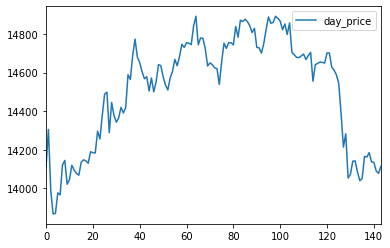

In [6]:
df['day_price'] = df['day_price'].str.replace("IDR","")
df['day_price'] = df['day_price'].str.replace(",","")
df['day_price'] = df['day_price'].astype('float64')

df.plot()